In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive

/content/gdrive


In [4]:
cd MyDrive/

/content/gdrive/MyDrive


In [7]:
df = pd.read_csv("50000_3epochs.csv")
df = df.iloc[: , 1:]
df

,Generated Text,Actual Text,accuracy
0,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...,1
1,"the church teaches that god the father, jesus ...","the church teaches that god the father, jesus ...",1
2,"in 1970, curiel directed mil in two of his mos...","in 1970, curiel directed mil in two of his tea...",0
3,"when he returned, his mother told him his step...","when he returned, his mother told him his step...",0
4,"under fire is a political film set in 1979, du...","under fire is a political film set in 1979, du...",0
...,...,...,...
9995,"monbiot asserts that climate change is the ""mo...",monbiot has written that climate change is the...,0
9996,"the gospel according to john (greek ), commonl...","the gospel according to john (greek ), commonl...",1
9997,the south african farm attacks refer to the fa...,the south african farm attacks refer to the cl...,0
9998,"the christian forces captured buda, and in the...","the christian forces seized buda, and in the n...",0


In [ ]:
#df = pd.read_csv("biased.word.train.csv")
#df = df.iloc[: , 1:]
#df.columns = ["id", "source_tokenized", "target_tokenized", "source_raw", "target_raw","POS","POS_2"]
#df

,id,source_tokenized,target_tokenized,source_raw,target_raw,POS,POS_2
0,123204846,the free software gnu class ##path project is ...,the free software gnu class ##path project is ...,the free software gnu classpath project is onl...,the free software gnu classpath project is par...,DET ADJ NOUN NOUN NOUN NOUN NOUN VERB ADV ADV ...,det amod nmod compound compound compound nsubj...
1,706783956,"other campaign ##ers , especially the controve...","other campaign ##ers , especially the british ...","other campaigners, especially the controversia...","other campaigners, especially the british acti...",ADJ NOUN NOUN PUNCT ADV DET ADJ ADJ NOUN ADJ N...,amod nsubj nsubj punct advmod det amod amod am...
2,612378448,vocalist rob half ##ord ' s performance is con...,vocalist rob half ##ord ' s performance is con...,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...,ADJ X NOUN NOUN PUNCT PART NOUN VERB VERB NUM ...,amod amod poss poss punct case nsubjpass auxpa...
3,876796337,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,the proud general is a chinese animated featur...,DET ADJ NOUN VERB DET ADJ VERB NOUN NOUN VERB ...,det amod nsubj ROOT det amod amod attr attr ac...
4,91653449,"gaming system , an dice pool system where matc...","gaming system , a unique dice pool system wher...","gaming system, an dice pool system where match...","gaming system, a unique dice pool system where...",NOUN NOUN PUNCT DET NOUN NOUN NOUN ADV VERB VE...,compound ROOT punct det compound compound appo...
...,...,...,...,...,...,...,...
53797,341593940,the national lawyers guild is a progressive / ...,the national lawyers guild is a progressive ba...,the national lawyers guild is a progressive /l...,the national lawyers guild is a progressive ba...,DET ADJ NOUN ADJ VERB DET ADJ SYM ADJ PUNCT NO...,det amod compound nsubj ROOT det amod punct am...
53798,640510650,a plan to red ##eve ##lo ##p the old tiger sta...,a plan to red ##eve ##lo ##p the old tiger sta...,a plan to redevelop the old tiger stadium site...,a plan to redevelop the old tiger stadium site...,DET NOUN PART VERB VERB VERB VERB DET ADJ NOUN...,det nsubj aux acl acl acl acl det amod compoun...
53799,162719260,"instrumental ##ly , life ##son is regarded as ...","instrumental ##ly , life ##son is regarded as ...","instrumentally, lifeson is regarded as a virtu...","instrumentally, lifeson is regarded as a guita...",ADV ADV PUNCT NOUN NOUN VERB VERB ADP DET ADJ ...,advmod advmod punct nsubjpass nsubjpass auxpas...
53800,62331672,fly ##nt joined the us army in 1958 at only fi...,fly ##nt joined the us army in 1958 at only fi...,flynt joined the us army in 1958 at only fifte...,flynt joined the us army in 1958 at only fifte...,NOUN NOUN VERB DET PRON NOUN ADP NUM ADP ADV N...,nsubj nsubj ROOT det compound dobj prep pobj p...


In [28]:

for index, row in df.iterrows():
  df.loc[index, 'actual_length'] = len(row['Actual Text'])


In [29]:
df

,Generated Text,Actual Text,accuracy,actual_length
0,vocalist rob halford's performance is consider...,vocalist rob halford's performance is consider...,1,148.0
1,"the church teaches that god the father, jesus ...","the church teaches that god the father, jesus ...",1,174.0
2,"in 1970, curiel directed mil in two of his mos...","in 1970, curiel directed mil in two of his tea...",0,58.0
3,"when he returned, his mother told him his step...","when he returned, his mother told him his step...",0,73.0
4,"under fire is a political film set in 1979, du...","under fire is a political film set in 1979, du...",0,99.0
...,...,...,...,...
9995,"monbiot asserts that climate change is the ""mo...",monbiot has written that climate change is the...,0,218.0
9996,"the gospel according to john (greek ), commonl...","the gospel according to john (greek ), commonl...",1,144.0
9997,the south african farm attacks refer to the fa...,the south african farm attacks refer to the cl...,0,176.0
9998,"the christian forces captured buda, and in the...","the christian forces seized buda, and in the n...",0,157.0


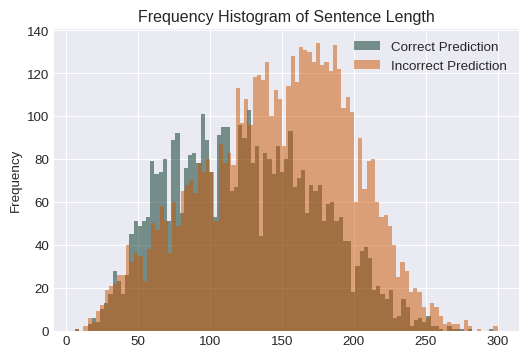

In [39]:
x1 = df.loc[df.accuracy==1, 'actual_length']
x2 = df.loc[df.accuracy==0, 'actual_length']

kwargs = dict(alpha=0.5, bins=100)

my_dpi=96
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)

plt.hist(x1, **kwargs, color='#013220', label='Correct Prediction')
plt.hist(x2, **kwargs, color='#CC5500', label='Incorrect Prediction')
plt.gca().set(title='Frequency Histogram of Sentence Length', ylabel='Frequency')
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


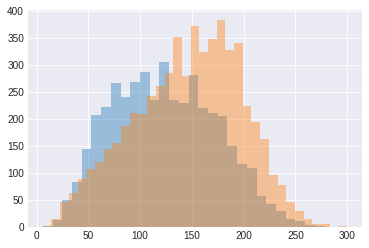

In [26]:
#plt.style.use('seaborn-darkgrid')
#plt.hist(losses, 50)

# set figure size
#my_dpi=96
#plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)

#sns.distplot([wins])
fig, ax = plt.subplots()
for a in [wins, losses]:
    sns.distplot(a, ax=ax, kde=False)

In [ ]:
data = [[500, 0.06, .717, .45, .965],
        [2500, 0.168, 0.793, 0.563, 0.9755],
        [5000, 0.213, 0.827, .603, 0.9797],
        [10000, .249, .866, .685, .985],
        [50000, .3603, .884, .687, .987]]

results = pd.DataFrame(data, columns = ['Training_Size', 'Accuracy', 'BLEU', 'BLEURT', 'BERTscore'])

In [ ]:
results

,Training_Size,Accuracy,BLEU,BLEURT,BERTscore
0,500,0.0600,0.717,0.450,0.9650
1,2500,0.1680,0.793,0.563,0.9755
2,5000,0.2130,0.827,0.603,0.9797
3,10000,0.2490,0.866,0.685,0.9850
4,50000,0.3603,0.884,0.687,0.9870


In [ ]:
results.values[3][1:]

array([0.3603, 0.884 , 0.687 , 0.987 ])

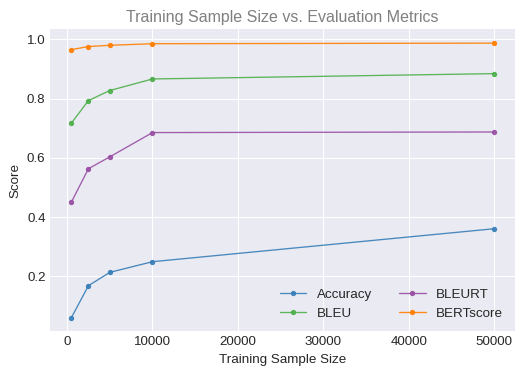

In [ ]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')

# set figure size
my_dpi=96
plt.figure(figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)

palette = plt.get_cmap('Set1')
 
num=0
for column in results.drop('Training_Size', axis=1):
    num+=1
    plt.plot(results['Training_Size'], results[column], marker='.', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
 

# Add legend
plt.legend(loc=4, ncol=2)

 
# Add titles
plt.title("Training Sample Size vs. Evaluation Metrics", loc='center', fontsize=12, fontweight=0, color='gray')
plt.xlabel("Training Sample Size")
plt.ylabel("Score")

# Show the graph
plt.show()

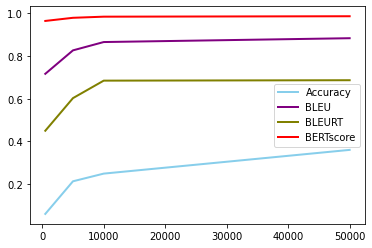

In [ ]:
# multiple line plots
plt.plot( 'Training_Size', 'Accuracy', data=results, marker='', color='skyblue', linewidth=2)
plt.plot( 'Training_Size', 'BLEU', data=results, marker='', color='purple', linewidth=2)
plt.plot( 'Training_Size', 'BLEURT', data=results, marker='', color='olive', linewidth=2)
plt.plot( 'Training_Size', 'BERTscore', data=results, marker='', color='red', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()